In [1]:
import os
import json

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-v0_8')

In [2]:
for i, path in enumerate(os.walk('export')):
    if i == 0:
        continue  # skip 'export' directory, only look at sub-directories
    print(path)

('export\\banknote-authentication', [], ['gen-0.json', 'gen-1.json', 'gen-10.json', 'gen-11.json', 'gen-12.json', 'gen-13.json', 'gen-14.json', 'gen-15.json', 'gen-16.json', 'gen-17.json', 'gen-18.json', 'gen-19.json', 'gen-2.json', 'gen-20.json', 'gen-21.json', 'gen-22.json', 'gen-23.json', 'gen-3.json', 'gen-4.json', 'gen-5.json', 'gen-6.json', 'gen-7.json', 'gen-8.json', 'gen-9.json', 'pareto.json'])
('export\\blood-transfusion-service-center', [], ['gen-0.json', 'gen-1.json', 'gen-10.json', 'gen-11.json', 'gen-12.json', 'gen-13.json', 'gen-14.json', 'gen-15.json', 'gen-16.json', 'gen-17.json', 'gen-18.json', 'gen-19.json', 'gen-2.json', 'gen-20.json', 'gen-21.json', 'gen-22.json', 'gen-23.json', 'gen-24.json', 'gen-25.json', 'gen-26.json', 'gen-27.json', 'gen-28.json', 'gen-29.json', 'gen-3.json', 'gen-30.json', 'gen-31.json', 'gen-32.json', 'gen-33.json', 'gen-34.json', 'gen-35.json', 'gen-36.json', 'gen-37.json', 'gen-38.json', 'gen-39.json', 'gen-4.json', 'gen-40.json', 'gen-41.

Plot (stop early set) losses of Pareto set

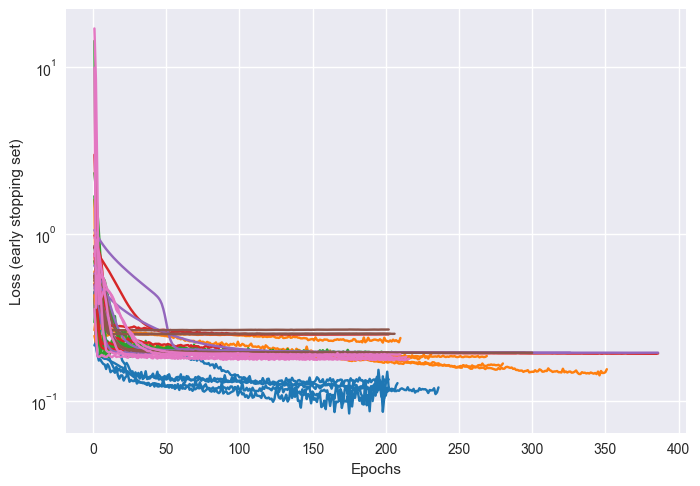

In [3]:
with open(os.path.join(path[0], 'pareto.json')) as f_pareto:
    pareto = json.load(f_pareto)

fig1, ax1 = plt.subplots()

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for i, individual in enumerate(pareto['set']):
    losses = individual['metrics']['performance']['loss']

    for fold, loss_tuple in enumerate(losses):
        x = range(1, len(loss_tuple[1]) + 1)
        y = loss_tuple[1]

        ax1.plot(x, y, color=colours[i], label=f'Individual {i+1}')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (early stopping set)')
ax1.set_yscale('log')
#ax1.legend()

Plot (CV / val set) dominated hypervolumes of Pareto front

('export\\wilt', [], ['gen-0.json', 'gen-1.json', 'gen-2.json', 'gen-3.json', 'gen-4.json', 'gen-5.json', 'gen-6.json', 'pareto.json'])


Text(0, 0.5, 'Dominated Hypervolume')

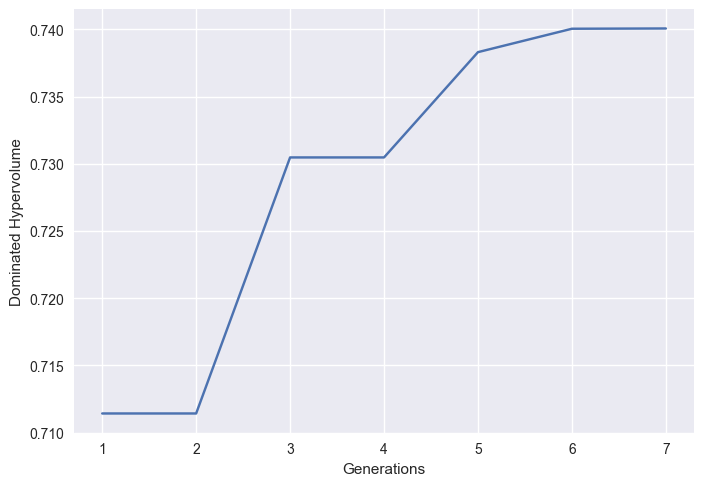

In [4]:
print(path)

dhvs = list()
for file_name in path[2]:
    if file_name == 'pareto.json':
        continue

    with open(os.path.join(path[0], file_name)) as file:
        gen = json.load(file)

    dhvs.append(gen['dhv_val'])

fig1, ax1 = plt.subplots()
x = range(1, len(dhvs) + 1)
ax1.plot(x, dhvs)
ax1.set_xlabel('Generations')
ax1.set_ylabel('Dominated Hypervolume')